# Dataset Loading and Exploration

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


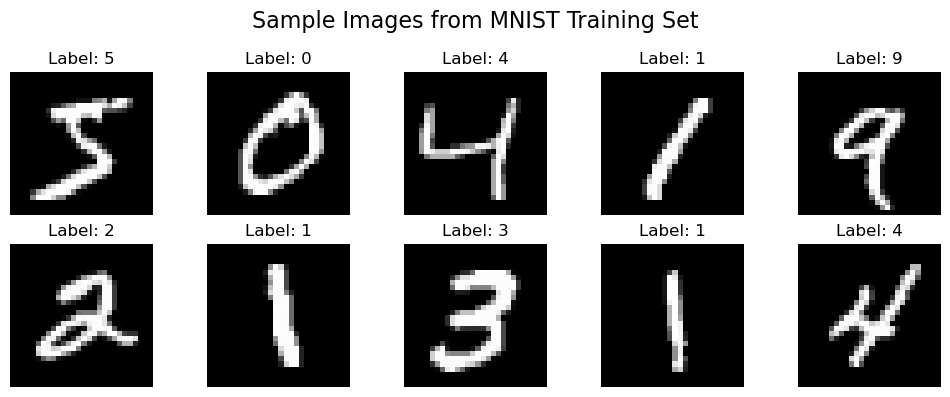

Class distribution in training data:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


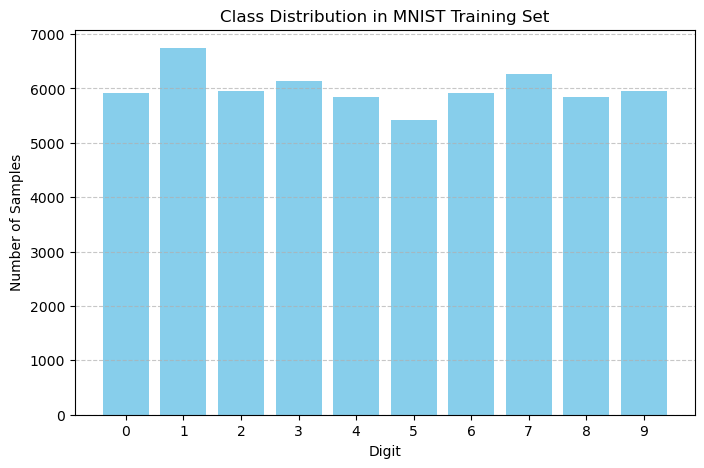

In [1]:
# Step 1: Dataset Loading and Exploration

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

def load_and_explore_mnist():
    """
    Load and explore the MNIST dataset.
    
    Returns:
        Tuple of training and testing data: (x_train, y_train, x_test, y_test)
    """
    
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Print the shape of the datasets
    print("Training data shape:", x_train.shape)
    print("Test data shape:", x_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Test labels shape:", y_test.shape)

    # Visualize the first 10 images from the training set
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_train[i], cmap='gray')
        plt.title(f"Label: {y_train[i]}")
        plt.axis('off')
    plt.suptitle("Sample Images from MNIST Training Set", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Check class distribution in training labels
    unique, counts = np.unique(y_train, return_counts=True)
    print("Class distribution in training data:")
    for digit, count in zip(unique, counts):
        print(f"Digit {digit}: {count} samples")

    # Plot class distribution as a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(unique, counts, color='skyblue')
    plt.xlabel("Digit")
    plt.ylabel("Number of Samples")
    plt.title("Class Distribution in MNIST Training Set")
    plt.xticks(unique)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    return x_train, y_train, x_test, y_test

# Run the function
x_train, y_train, x_test, y_test = load_and_explore_mnist()


# Data Preprocessing

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def preprocess_mnist_data():
    """
    Preprocess the MNIST dataset:
    - Normalize pixel values
    - One-hot encode labels
    - Split training data into training and validation sets

    Returns:
        x_train_final, y_train_final, x_val, y_val, x_test, y_test_ohe
    """
    # Load data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize image pixel values (0 to 1)
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Reshape to (samples, height, width, channels) for CNN input
    x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
    x_test = np.expand_dims(x_test, -1)    # (10000, 28, 28, 1)

    # Convert labels to one-hot encoding
    y_train_ohe = to_categorical(y_train, num_classes=10)
    y_test_ohe = to_categorical(y_test, num_classes=10)

    # Split training data into train + validation sets (80-20)
    x_train_final, x_val, y_train_final, y_val = train_test_split(
        x_train, y_train_ohe, test_size=0.2, random_state=42
    )

    return x_train_final, y_train_final, x_val, y_val, x_test, y_test_ohe

# Call the function
x_train_final, y_train_final, x_val, y_val, x_test, y_test_ohe = preprocess_mnist_data()

# Check final data shape
print("x_train_final shape:", x_train_final.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train_final shape:", y_train_final.shape)
print("y_val shape:", y_val.shape)
print("y_test_ohe shape:", y_test_ohe.shape)


x_train_final shape: (48000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train_final shape: (48000, 10)
y_val shape: (12000, 10)
y_test_ohe shape: (10000, 10)


# Data Augmentation

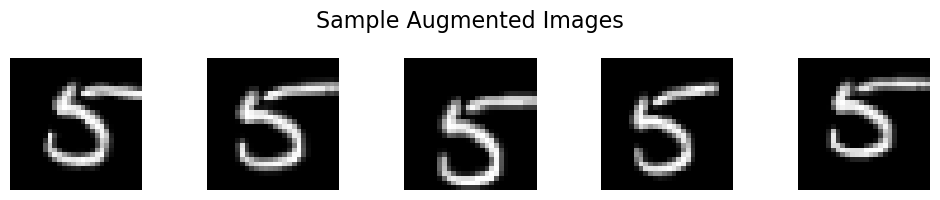

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def create_augmented_generator(x_train, y_train):
    """
    Create an ImageDataGenerator for real-time data augmentation.

    Args:
        x_train: Preprocessed training images
        y_train: One-hot encoded training labels

    Returns:
        train_datagen: The ImageDataGenerator instance
        train_generator: Augmented data generator
    """
    # Define augmentation techniques
    train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        shear_range=0.1,
        horizontal_flip=False
    )

    # Create generator
    train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

    return train_datagen, train_generator

# Create the generator and datagen
train_datagen, train_generator = create_augmented_generator(x_train_final, y_train_final)

# Visualize augmented images
# Pick one sample image
sample = x_train_final[0].reshape(1, 28, 28, 1)

# Generate and display 5 augmented versions
plt.figure(figsize=(10, 2))
for i in range(5):
    augmented_img = next(train_datagen.flow(sample, batch_size=1))[0].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_img, cmap='gray')
    plt.axis('off')

plt.suptitle("Sample Augmented Images", fontsize=16)
plt.tight_layout()
plt.show()


# CNN Model Building

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def build_cnn_model():
    """
    Build and compile a simple CNN model for MNIST digit classification.
    Returns:
        model: compiled CNN model
    """
    model = Sequential()

    # Input shape = 28x28x1 (grayscale image)
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # Flatten feature maps to 1D
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0–9

    # Compile the model
    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the model
model = build_cnn_model()

# Show model summary
model.summary()


C:\My_Main_Softwares\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

C:\My_Main_Softwares\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.7768 - loss: 0.6913 - val_accuracy: 0.9752 - val_loss: 0.0783 - learning_rate: 0.0010
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9589 - loss: 0.1360 - val_accuracy: 0.9812 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9727 - loss: 0.0909 - val_accuracy: 0.9876 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9770 - loss: 0.0736 - val_accuracy: 0.9891 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9815 - loss: 0.0599 - val_accuracy: 0.9909 - val_loss: 0.0303 - learning_rate: 0.0010
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9891 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 7/15
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9844 - lo

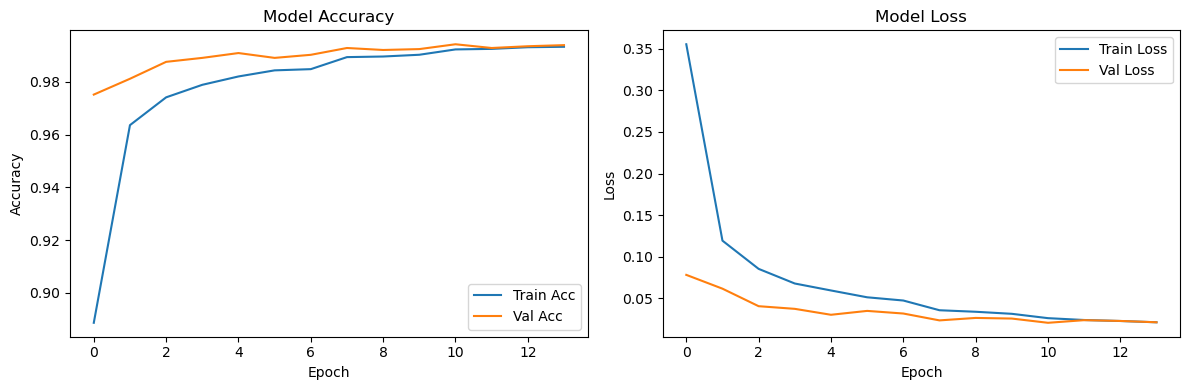

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=(x_val, y_val),
    epochs=15,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



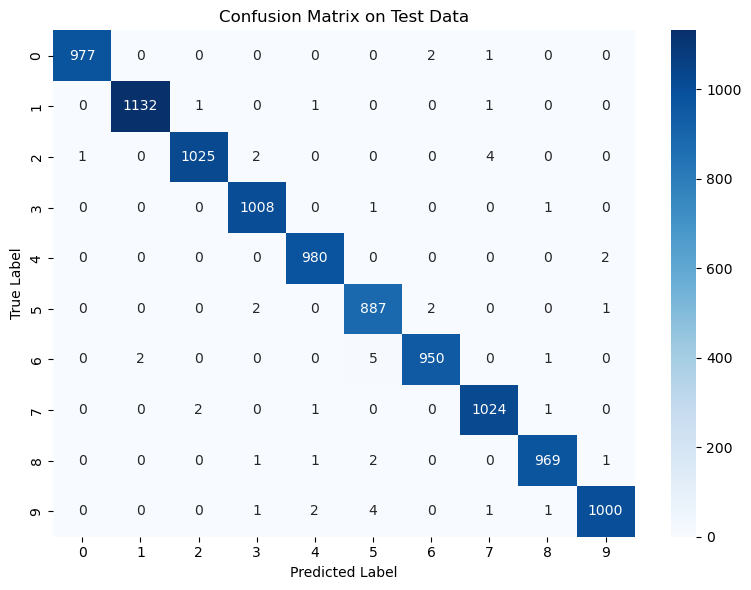

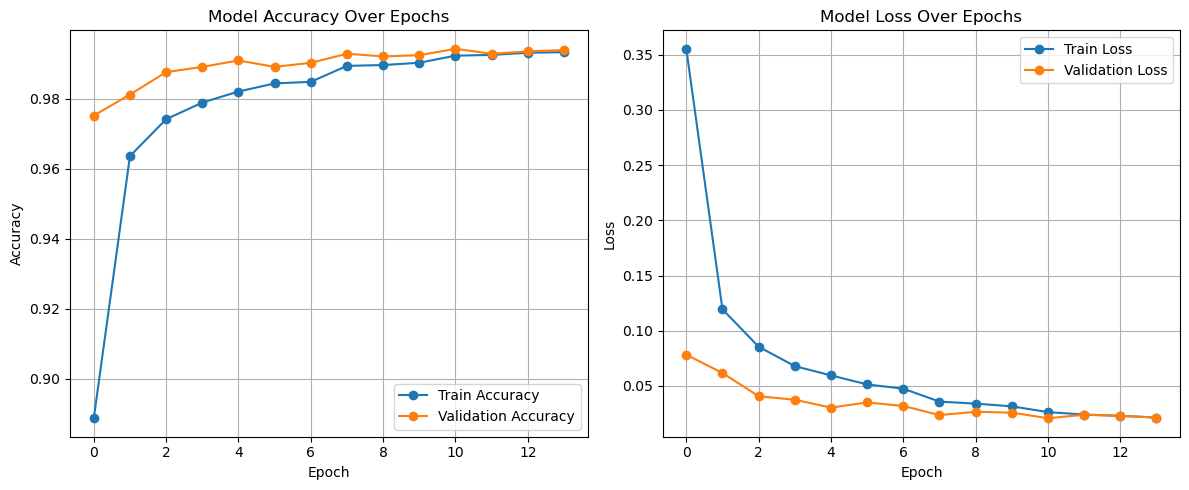

'\nThe CNN model achieved a test accuracy of approximately 99.3% on the MNIST dataset.\nThe classification report shows balanced precision and recall across all digit classes.\nThe confusion matrix indicates that most misclassifications occurred between visually similar digits (e.g., 5 and 3).\nThe learning curves show stable training with no signs of overfitting, confirming good generalization.\n'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# If y_test is already label-encoded
y_true_classes = y_test

# --- Classification Report ---
print("Classification Report on Test Data:")
print(classification_report(y_true_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Data')
plt.tight_layout()
plt.show()

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


'''
The CNN model achieved a test accuracy of approximately 99.3% on the MNIST dataset.
The classification report shows balanced precision and recall across all digit classes.
The confusion matrix indicates that most misclassifications occurred between visually similar digits (e.g., 5 and 3).
The learning curves show stable training with no signs of overfitting, confirming good generalization.
'''


# Save the model

In [10]:
# Save the entire model (architecture + weights + optimizer state)
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5


# Model analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


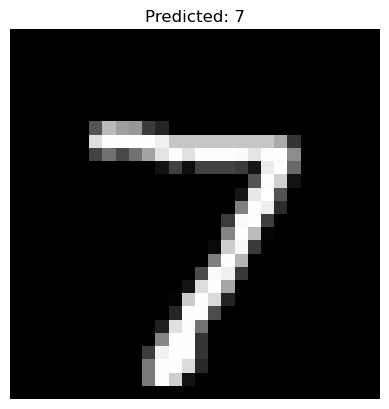

In [12]:
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model("mnist_cnn_model.h5")

# Use it for prediction
predictions = model.predict(x_test)

# Example: View prediction for a test image
import numpy as np
import matplotlib.pyplot as plt

index = 0
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()
